In [125]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import os

In [5]:
!ls data

sample_submission_V2.csv test_V2.csv              train_V2.csv


## Investigate

In [143]:
pd.set_option('display.max_columns', 500)

In [7]:
raw_train_data = pd.read_csv('./data/train_V2.csv')

In [8]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [9]:
raw_train_datain_datain_datain_datain_datain_datain_datain_datain_datatrain_data_train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [12]:
raw_train_data.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [132]:
raw_train_data.loc[:, ['matchId', 'groupId', 'Id', 'winPlacePerc']].sort_values(by=['matchId', 'groupId', 'winPlacePerc']).head(25)

,matchId,groupId,Id,winPlacePerc
2639119,0000a43bce5eec,18b16ec699d8b6,023a9418cf67b0,0.3333
2843474,0000a43bce5eec,18b16ec699d8b6,6703bc191cff0a,0.3333
1425950,0000a43bce5eec,236ab9e9c081b9,5a3afae17b53c0,0.0370
1998699,0000a43bce5eec,236ab9e9c081b9,e431d8a8f6c99b,0.0370
2290792,0000a43bce5eec,236ab9e9c081b9,e7b325d63d8393,0.0370
3088817,0000a43bce5eec,236ab9e9c081b9,17f3544a0fdde4,0.0370
4131025,0000a43bce5eec,236ab9e9c081b9,3d96e46bfa404c,0.0370
4367296,0000a43bce5eec,236ab9e9c081b9,1845bd80ef1e31,0.0370
3599150,0000a43bce5eec,3a6addfa0df938,fc62a751955351,0.0000
3895898,0000a43bce5eec,3a6addfa0df938,7ad5883d71d42e,0.0000


In [141]:
grouped_train_data = raw_train_data.groupby(['matchId', 'groupId','matchType']).size().reset_index(name='groupSize')

In [142]:
grouped_train_data[grouped_train_data['groupSize'] > 50]

,matchId,groupId,matchType,groupSize
486895,3e029737889ce9,b8275198faa03b,duo-fpp,72
516661,41a634f62f86b7,128b07271aa012,solo-fpp,64
1416592,b30f3d87189aa6,14d6b54cdec6bc,normal-squad-fpp,74


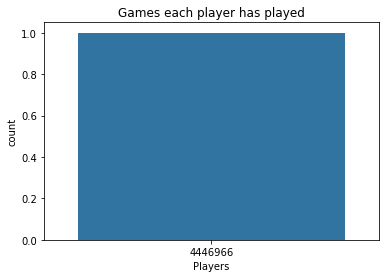

In [85]:
data = (raw_train_data
 .groupby(by='Id', as_index=False).size().reset_index(name='NumOfGames')
 .groupby(by='NumOfGames', as_index=False).size().reset_index(name='Players')
)
plt.figure()
sns.countplot(data['Players'].astype('str').sort_values())
plt.title("Games each player has played",fontsize=12)
plt.show()

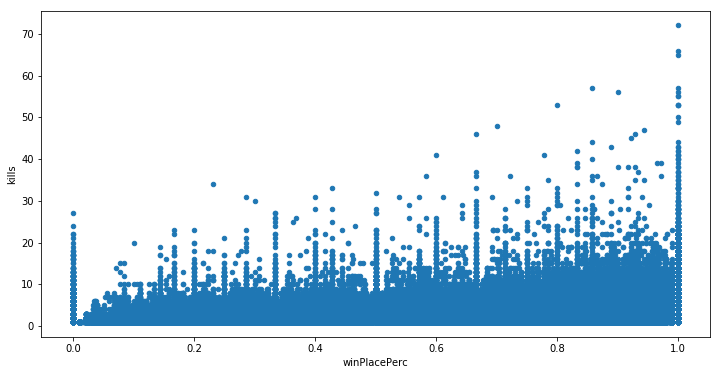

In [127]:
raw_train_data[raw_train_data['kills'] > 0].plot.scatter(x='winPlacePerc', y='kills', figsize=(12, 6))

In [160]:
raw_train_data[raw_train_data['matchId'] == '41a634f62f86b7']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
29680,747a410b07a1a0,128b07271aa012,41a634f62f86b7,0,0,100.00,0,0,0,18,0,1,1,40.020,1044,solo-fpp,97,34,1702,0,0.0,0,0.0,0,0,79.95,2,0,0.2812
61381,4d23e469ca2f13,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,41,0,0,0,0.000,1044,solo-fpp,97,34,1711,0,0.0,0,0.0,0,0,619.00,0,0,0.2812
72990,7c781cd3927554,128b07271aa012,41a634f62f86b7,0,0,23.50,0,0,1,11,0,1,1,12.500,1044,solo-fpp,97,34,1499,0,0.0,0,0.0,0,0,116.40,4,0,0.2812
119749,058ec2659e12c5,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,59,0,0,0,0.000,1044,solo-fpp,97,34,1712,0,0.0,0,0.0,0,0,153.10,3,0,0.2812
132197,545e23506cbe41,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,43,0,0,0,0.000,1044,solo-fpp,97,34,1629,0,0.0,0,0.0,0,0,48.45,2,0,0.2812
137222,fbe28e58aca080,ec78ad2bb19110,41a634f62f86b7,1,0,43.00,0,0,0,82,0,0,0,0.000,1044,solo-fpp,97,34,1536,0,0.0,0,0.0,0,0,41.37,1,0,0.1771
252920,750ad651459b54,128b07271aa012,41a634f62f86b7,0,0,41.85,0,0,0,37,0,0,0,0.000,1044,solo-fpp,97,34,1626,0,0.0,0,0.0,0,0,33.03,1,0,0.2812
257403,5fe55e7e7adc53,27930d951243df,41a634f62f86b7,0,0,0.00,0,0,0,94,0,0,0,0.000,1044,solo-fpp,97,34,1599,0,0.0,0,0.0,0,0,0.00,2,0,0.0312
284293,38c7c81d3360bc,0c33ad03fdb940,41a634f62f86b7,0,0,51.70,0,0,0,83,0,0,0,0.000,1044,solo-fpp,97,34,1500,0,0.0,0,0.0,0,0,26.65,1,0,0.1667
302076,e27590d71a4c20,128b07271aa012,41a634f62f86b7,0,0,100.00,0,0,0,14,0,1,1,24.070,1044,solo-fpp,97,34,1500,0,0.0,0,0.0,0,0,33.19,1,0,0.2812


## Feature Engineering

In [34]:
features = list(raw_train_data.drop(['Id', 'matchId', 'groupId', 'matchType'], axis=1).columns)
features

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

### Aggregate features

In [162]:
aggs = {}
for feature in features:
    aggs[feature] = ['count', 'mean'] if feature in ['winPlacePerc'] else ['mean', 'std', 'max', 'min']
    
train_data = raw_train_data.groupby(['matchId', 'groupId', 'matchType'], as_index=False).agg(aggs)
train_data.head(5)

matchId         groupId  matchType assists              boosts  \
                                                mean  std max min   mean   
0  0000a43bce5eec  18b16ec699d8b6  squad-fpp     0.0  0.0   0   0    0.5   
1  0000a43bce5eec  236ab9e9c081b9  squad-fpp     0.0  0.0   0   0    0.0   
2  0000a43bce5eec  3a6addfa0df938  squad-fpp     0.0  0.0   0   0    0.0   
3  0000a43bce5eec  4bf06994bd4c9a  squad-fpp     0.0  0.0   0   0    0.5   
4  0000a43bce5eec  4d1bbbc19b9084  squad-fpp     1.0  0.0   1   1    3.5   

                    damageDealt                                DBNOs  \
        std max min        mean         std    max     min      mean   
0  0.707107   1   0  109.675000  127.738840  200.0   19.35  1.000000   
1  0.000000   0   0   47.988333   48.957148  121.3    0.00  0.333333   
2  0.000000   0   0    0.000000    0.000000    0.0    0.00  0.000000   
3  0.707107   1   0   11.700000   16.546299   23.4    0.00  0.000000   
4  0.707107   4   3  340.950000  267.498495  530.1  151.80  2.500000   

                    headshotKills              heals                    \
        std max min          mean  std max min  mean       std max min   
0  1.414214   2   0           0.0  0.0   0   0   0.5  0.707107   1   0   
1  0.816497   2   0           0.0  0.0   0   0   0.0  0.000000   0   0   
2  0.000000   0   0           0.0  0.0   0   0   0.0  0.000000   0   0   
3  0.000000   0   0           0.0  0.0   0   0   0.0  0.000000   0   0   
4  2.121320   4   1           1.0  0.0   1   1   1.0  1.414214   2   0   

  killPlace                    killPoints                         kills  \
       mean        std max min       mean         std   max   min  mean   
0      41.0  28.284271  61  21     1242.0  250.315801  1419  1065   1.0   
1      90.5   1.870829  93  88     1355.5   99.488190  1470  1244   0.0   
2      94.5   0.707107  95  94     1382.0  107.480231  1458  1306   0.0   
3      59.5   0.707107  60  59     1178.0   15.556349  1189  1167   0.0   
4      14.0  12.727922  23   5     1504.0  277.185858  1700  1308   3.0   

                    killStreaks                   longestKill             \
        std max min        mean       std max min        mean        std   
0  1.414214   2   0         0.5  0.707107   1   0       6.275   8.874190   
1  0.000000   0   0         0.0  0.000000   0   0       0.000   0.000000   
2  0.000000   0   0         0.0  0.000000   0   0       0.000   0.000000   
3  0.000000   0   0         0.0  0.000000   0   0       0.000   0.000000   
4  2.828427   5   1         1.5  0.707107   2   1      25.230  11.582409   

                matchDuration                  maxPlace               \
     max    min          mean  std   max   min     mean  std max min   
0  12.55   0.00          1346  0.0  1346  1346       28  0.0  28  28   
1   0.00   0.00          1346  0.0  1346  1346       28  0.0  28  28   
2   0.00   0.00          1346  0.0  1346  1346       28  0.0  28  28   
3   0.00   0.00          1346  0.0  1346  1346       28  0.0  28  28   
4  33.42  17.04          1346  0.0  1346  1346       28  0.0  28  28   

  numGroups              rankPoints              revives               \
       mean  std max min       mean  std max min    mean  std max min   
0        28  0.0  28  28        0.0  0.0   0   0     0.0  0.0   0   0   
1        28  0.0  28  28        0.0  0.0   0   0     0.0  0.0   0   0   
2        28  0.0  28  28        0.0  0.0   0   0     0.0  0.0   0   0   
3        28  0.0  28  28        0.0  0.0   0   0     0.0  0.0   0   0   
4        28  0.0  28  28        0.0  0.0   0   0     0.0  0.0   0   0   

  rideDistance                           roadKills              swimDistance  \
          mean         std    max    min      mean  std max min         mean   
0        0.000    0.000000    0.0  0.000       0.0  0.0   0   0        0.000   
1        0.000    0.000000    0.0  0.000       0.0  0.0   0   0        0.000   
2        0.000    0.000000    0.0  0.000       0.0  0.0  

In [163]:
train_data.columns = ['_'.join(t).rstrip('_') if t != ('winPlacePerc', 'count') else 'groupSize'  for t in train_data.columns.values]
train_data.head(25)

,matchId,groupId,matchType,assists_mean,assists_std,assists_max,assists_min,boosts_mean,boosts_std,boosts_max,boosts_min,damageDealt_mean,damageDealt_std,damageDealt_max,damageDealt_min,DBNOs_mean,DBNOs_std,DBNOs_max,DBNOs_min,headshotKills_mean,headshotKills_std,headshotKills_max,headshotKills_min,heals_mean,heals_std,heals_max,heals_min,killPlace_mean,killPlace_std,killPlace_max,killPlace_min,killPoints_mean,killPoints_std,killPoints_max,killPoints_min,kills_mean,kills_std,kills_max,kills_min,killStreaks_mean,killStreaks_std,killStreaks_max,killStreaks_min,longestKill_mean,longestKill_std,longestKill_max,longestKill_min,matchDuration_mean,matchDuration_std,matchDuration_max,matchDuration_min,maxPlace_mean,maxPlace_std,maxPlace_max,maxPlace_min,numGroups_mean,numGroups_std,numGroups_max,numGroups_min,rankPoints_mean,rankPoints_std,rankPoints_max,rankPoints_min,revives_mean,revives_std,revives_max,revives_min,rideDistance_mean,rideDistance_std,rideDistance_max,rideDistance_min,roadKills_mean,roadKills_std,roadKills_max,roadKills_min,swimDistance_mean,swimDistance_std,swimDistance_max,swimDistance_min,teamKills_mean,teamKills_std,teamKills_max,teamKills_min,vehicleDestroys_mean,vehicleDestroys_std,vehicleDestroys_max,vehicleDestroys_min,walkDistance_mean,walkDistance_std,walkDistance_max,walkDistance_min,weaponsAcquired_mean,weaponsAcquired_std,weaponsAcquired_max,weaponsAcquired_min,winPoints_mean,winPoints_std,winPoints_max,winPoints_min,groupSize,winPlacePerc_mean
0,0000a43bce5eec,18b16ec699d8b6,squad-fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,109.675000,127.738840,200.00,19.350,1.000000,1.414214,2,0,0.000000,0.000000,0,0,0.500000,0.707107,1,0,41.000000,28.284271,61,21,1242.000000,250.315801,1419,1065,1.000000,1.414214,2,0,0.500000,0.707107,1,0,6.275000,8.874190,12.550,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,131.685000,81.621336,189.400,73.97,1.000000,0.000000,1,1,1479.000000,7.071068,1484,1474,2,0.3333
1,0000a43bce5eec,236ab9e9c081b9,squad-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,47.988333,48.957148,121.30,0.000,0.333333,0.816497,2,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,90.500000,1.870829,93,88,1355.500000,99.488190,1470,1244,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,19.931833,19.691803,56.160,0.00,0.833333,0.408248,1,0,1464.000000,51.013724,1547,1411,6,0.0370
2,0000a43bce5eec,3a6addfa0df938,squad-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,94.500000,0.707107,95,94,1382.000000,107.480231,1458,1306,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,4.818000,6.813681,9.636,0.00,0.500000,0.707107,1,0,1485.000000,101.823376,1557,1413,2,0.0000
3,0000a43bce5eec,4bf06994bd4c9a,squad-fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,11.700000,16.546299,23.40,0.000,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,59.500000,0.707107,60,59,1178.000000,15.556349,1189,1167,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,559.050000,298.894036,770.400,347.70,7.000000,7.071068,12,2,1458.000000,35.355339,1483,1433,2,0.3704
4,0000a43bce5eec,4d1bbbc19b9084,squad-fpp,1.000000,0.000000,1,1,3.500000,0.707107,4,3,340.950000,267.

In [164]:
train_data.fillna(value=0, inplace=True)
train_data.head(25)

,matchId,groupId,matchType,assists_mean,assists_std,assists_max,assists_min,boosts_mean,boosts_std,boosts_max,boosts_min,damageDealt_mean,damageDealt_std,damageDealt_max,damageDealt_min,DBNOs_mean,DBNOs_std,DBNOs_max,DBNOs_min,headshotKills_mean,headshotKills_std,headshotKills_max,headshotKills_min,heals_mean,heals_std,heals_max,heals_min,killPlace_mean,killPlace_std,killPlace_max,killPlace_min,killPoints_mean,killPoints_std,killPoints_max,killPoints_min,kills_mean,kills_std,kills_max,kills_min,killStreaks_mean,killStreaks_std,killStreaks_max,killStreaks_min,longestKill_mean,longestKill_std,longestKill_max,longestKill_min,matchDuration_mean,matchDuration_std,matchDuration_max,matchDuration_min,maxPlace_mean,maxPlace_std,maxPlace_max,maxPlace_min,numGroups_mean,numGroups_std,numGroups_max,numGroups_min,rankPoints_mean,rankPoints_std,rankPoints_max,rankPoints_min,revives_mean,revives_std,revives_max,revives_min,rideDistance_mean,rideDistance_std,rideDistance_max,rideDistance_min,roadKills_mean,roadKills_std,roadKills_max,roadKills_min,swimDistance_mean,swimDistance_std,swimDistance_max,swimDistance_min,teamKills_mean,teamKills_std,teamKills_max,teamKills_min,vehicleDestroys_mean,vehicleDestroys_std,vehicleDestroys_max,vehicleDestroys_min,walkDistance_mean,walkDistance_std,walkDistance_max,walkDistance_min,weaponsAcquired_mean,weaponsAcquired_std,weaponsAcquired_max,weaponsAcquired_min,winPoints_mean,winPoints_std,winPoints_max,winPoints_min,groupSize,winPlacePerc_mean
0,0000a43bce5eec,18b16ec699d8b6,squad-fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,109.675000,127.738840,200.00,19.350,1.000000,1.414214,2,0,0.000000,0.000000,0,0,0.500000,0.707107,1,0,41.000000,28.284271,61,21,1242.000000,250.315801,1419,1065,1.000000,1.414214,2,0,0.500000,0.707107,1,0,6.275000,8.874190,12.550,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,131.685000,81.621336,189.400,73.97,1.000000,0.000000,1,1,1479.000000,7.071068,1484,1474,2,0.3333
1,0000a43bce5eec,236ab9e9c081b9,squad-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,47.988333,48.957148,121.30,0.000,0.333333,0.816497,2,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,90.500000,1.870829,93,88,1355.500000,99.488190,1470,1244,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,19.931833,19.691803,56.160,0.00,0.833333,0.408248,1,0,1464.000000,51.013724,1547,1411,6,0.0370
2,0000a43bce5eec,3a6addfa0df938,squad-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,94.500000,0.707107,95,94,1382.000000,107.480231,1458,1306,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,4.818000,6.813681,9.636,0.00,0.500000,0.707107,1,0,1485.000000,101.823376,1557,1413,2,0.0000
3,0000a43bce5eec,4bf06994bd4c9a,squad-fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,11.700000,16.546299,23.40,0.000,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,59.500000,0.707107,60,59,1178.000000,15.556349,1189,1167,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000,0.000,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.000000,0.00000,0,0,0.000000,0.00000,0,0,559.050000,298.894036,770.400,347.70,7.000000,7.071068,12,2,1458.000000,35.355339,1483,1433,2,0.3704
4,0000a43bce5eec,4d1bbbc19b9084,squad-fpp,1.000000,0.000000,1,1,3.500000,0.707107,4,3,340.950000,267.

In [166]:
train_data[train_data['matchId'] == '3e029737889ce9']

,matchId,groupId,matchType,assists_mean,assists_std,assists_max,assists_min,boosts_mean,boosts_std,boosts_max,boosts_min,damageDealt_mean,damageDealt_std,damageDealt_max,damageDealt_min,DBNOs_mean,DBNOs_std,DBNOs_max,DBNOs_min,headshotKills_mean,headshotKills_std,headshotKills_max,headshotKills_min,heals_mean,heals_std,heals_max,heals_min,killPlace_mean,killPlace_std,killPlace_max,killPlace_min,killPoints_mean,killPoints_std,killPoints_max,killPoints_min,kills_mean,kills_std,kills_max,kills_min,killStreaks_mean,killStreaks_std,killStreaks_max,killStreaks_min,longestKill_mean,longestKill_std,longestKill_max,longestKill_min,matchDuration_mean,matchDuration_std,matchDuration_max,matchDuration_min,maxPlace_mean,maxPlace_std,maxPlace_max,maxPlace_min,numGroups_mean,numGroups_std,numGroups_max,numGroups_min,rankPoints_mean,rankPoints_std,rankPoints_max,rankPoints_min,revives_mean,revives_std,revives_max,revives_min,rideDistance_mean,rideDistance_std,rideDistance_max,rideDistance_min,roadKills_mean,roadKills_std,roadKills_max,roadKills_min,swimDistance_mean,swimDistance_std,swimDistance_max,swimDistance_min,teamKills_mean,teamKills_std,teamKills_max,teamKills_min,vehicleDestroys_mean,vehicleDestroys_std,vehicleDestroys_max,vehicleDestroys_min,walkDistance_mean,walkDistance_std,walkDistance_max,walkDistance_min,weaponsAcquired_mean,weaponsAcquired_std,weaponsAcquired_max,weaponsAcquired_min,winPoints_mean,winPoints_std,winPoints_max,winPoints_min,groupSize,winPlacePerc_mean
486886,3e029737889ce9,014d49e075248d,duo-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,52.675000,5.777062,56.76,48.59,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,92.500000,0.707107,93,92,1221.000000,65.053824,1267,1175,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0000,0.000,1501,0.0,1501,1501,50,0.0,50,50,14,0.0,14,14,-1.0,0.0,-1,-1,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,126.000000,19.516147,139.80,112.2000,1.500000,0.707107,2,1,1539.000000,0.000000,1539,1539,2,0.0408
486887,3e029737889ce9,027acbdefaabeb,duo-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,20.000000,33.901531,78.26,0.00,0.200000,0.447214,1,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,97.000000,1.581139,99,95,1226.200000,138.232413,1366,1020,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0000,0.000,1501,0.0,1501,1501,50,0.0,50,50,14,0.0,14,14,-1.0,0.0,-1,-1,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,16.472000,26.884489,61.87,0.0000,0.400000,0.547723,1,0,1502.800000,52.126769,1562,1440,5,0.0000
486888,3e029737889ce9,08377106391dc7,duo-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,50.000000,70.710678,100.00,0.00,0.500000,0.707107,1,0,0.000000,0.000000,0,0,0.500000,0.707107,1,0,55.500000,54.447222,94,17,1291.000000,14.142136,1301,1281,0.500000,0.707107,1,0,0.500000,0.707107,1,0,0.467100,0.660579,0.9342,0.000,1501,0.0,1501,1501,50,0.0,50,50,14,0.0,14,14,-1.0,0.0,-1,-1,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,114.025000,50.310647,149.60,78.4500,4.000000,0.000000,4,4,1479.500000,28.991378,1500,1459,2,0.0204
486889,3e029737889ce9,0b3fba262a4732,duo-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,82.500000,0.707107,83,82,1390.500000,62.932504,1435,1346,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0000,0.000,1501,0.0,1501,1501,50,0.0,50,50,14,0.0,14,14,-1.0,0.0,-1,-1,0.000000,0.000000,0,0,1311.000000,258.801082,1494.0,1128.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,236.250000,101.752666,308.20,164.3000,2.000000,1.414214,3,1,1617.500000,4.949747,1621,1614,2,0.1633
486890,3e029737889ce9,3d8cc0f335a2f0,duo-fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,20.890000,29.542921,41.78,0.00,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,90.500

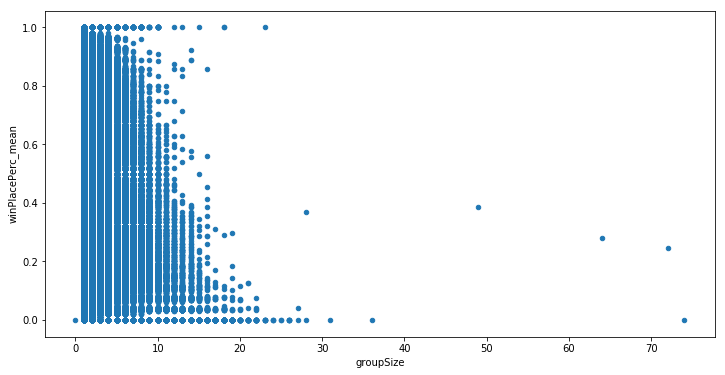

In [129]:
train_data.plot.scatter(x='groupSize', y='winPlacePerc_mean', figsize=(12, 6))

In [131]:
train_data[train_data['groupSize'] > 20]

,assists_mean,assists_std,assists_max,assists_min,boosts_mean,boosts_std,boosts_max,boosts_min,damageDealt_mean,damageDealt_std,...,weaponsAcquired_mean,weaponsAcquired_std,weaponsAcquired_max,weaponsAcquired_min,winPoints_mean,winPoints_std,winPoints_max,winPoints_min,winPlacePerc_mean,groupSize
36305,0.047619,0.218218,1,0,0.333333,0.658281,2,0,40.166667,52.523123,...,1.666667,1.852926,5,0,1257.523810,373.275852,1563,597,0.0000,21
82882,0.045455,0.213201,1,0,0.000000,0.000000,0,0,69.316364,95.408205,...,1.227273,0.812510,3,0,0.000000,0.000000,0,0,0.0385,22
88820,0.095238,0.300793,1,0,0.047619,0.218218,1,0,66.817619,93.885555,...,1.428571,1.287301,5,0,0.000000,0.000000,0,0,0.0000,21
140562,0.000000,0.000000,0,0,0.047619,0.218218,1,0,31.860000,70.213509,...,1.047619,1.395571,4,0,0.000000,0.000000,0,0,0.0000,21
171711,0.166667,0.380693,1,0,0.041667,0.204124,1,0,44.110833,53.431371,...,2.083333,1.665942,5,0,1447.541667,266.244245,1620,552,0.0000,24
203741,0.045455,0.213201,1,0,0.181818,0.394771,1,0,58.460000,76.156971,...,1.272727,1.485864,6,0,1490.000000,58.347073,1637,1341,0.0000,22
289056,0.136364,0.351250,1,0,0.136364,0.467563,2,0,31.267727,53.098642,...,1.590909,1.333063,4,0,1474.227273,35.661012,1521,1383,0.0000,22
314013,0.000000,0.000000,0,0,0.038462,0.196116,1,0,33.950000,48.009936,...,1.230769,1.031802,4,0,0.000000,0.000000,0,0,0.0000,26
371686,0.045455,0.213201,1,0,0.000000,0.000000,0,0,42.980636,56.757562,...,1.454545,1.335496,5,0,0.000000,0.000000,0,0,0.0000,22
402143,0.040000,0.200000,1,0,0.040000,0.200000,1,0,57.976400,71.718501,...,1.680000,1.029563,4,0,1409.160000,241.456808,1531,519,0.0000,25


In [121]:
target = 'winPlacePerc_mean'
X_train = np.array(train_data.loc[:, train_data.columns != target])
y_train = np.array(train_data[target])

In [122]:
y_train

array([0.3333, 0.037 , 0.    , ..., 0.    , 0.25  , 0.4643])

### Categorize features

### Normalize input

In [124]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.transform(X_train)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## The model

In [ ]:
N, dim = X_train.shape
model = nn.Sequential(
    nn.BatchNorm1d()
    nn.Linear(in_features=dim, out_features=128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=64, out_features=1)                     
)

### Train and predict

In [ ]:

tensor_X_train = torch.from_numpy(X_train)
tensor_y_train = torch.from_numpy(y_train)

train_dataset = torch.utils.data.TensorDataset(tensor_X_train, tensor_y_train) # create your datset
train_loader = utils.DataLoader(my_dataset) # create your dataloader

In [ ]:
criterion = nn.MSELoss()
lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
epochs = 30

for epoch in rage(epochs):
    running_loss = 0
    for inputs, scores in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, scores)
        loss.backword()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(train_loader)}")